# Pre-procesamiento de Datos


In [ ]:
# Importando líbrerias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler

import torch
from torch.utils.data import TensorDataset, DataLoader, random_split

from torchvision import datasets
from torchvision.transforms import ToTensor, transforms

In [ ]:
# Configuración del dispositivo
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cpu')

## Datos Estructurados

### Clase TensorDataset

#### Arreglos

In [ ]:
# Supongamos arreglos de una pequeña muestra de datos
n_muestras = 7
n_features = 5
features_array = np.array(np.random.rand(n_muestras, n_features))
target_array = np.array(np.random.rand(n_muestras, 1))

# Convertir arrays a tensores PyTorch
features_torch = torch.tensor(features_array)
target_torch = torch.tensor(target_array)

# Crear un TensorDataset a partir de los dos tensores (features, target)
dataset = TensorDataset(features_torch, target_torch)

# Retornar el último elemento del TensorDataset
print(dataset[-1])

(tensor([0.1884, 0.3469, 0.7291, 0.8152, 0.0311], dtype=torch.float64), tensor([0.8256], dtype=torch.float64))


In [ ]:
# Iterar a través del TensorDataset
print(f'Valores de:')
for i, data in enumerate(dataset):
      print(f'\t * features - muestra {i + 1}: {data[0]}')
      print(f'\t * target - muestra {i + 1}: {data[1]}', end='\n\n')

Valores de:
	 * features - muestra 1: tensor([0.2732, 0.8862, 0.1990, 0.7922, 0.9038], dtype=torch.float64)
	 * target - muestra 1: tensor([0.2009], dtype=torch.float64)

	 * features - muestra 2: tensor([0.7343, 0.4345, 0.6470, 0.6812, 0.0717], dtype=torch.float64)
	 * target - muestra 2: tensor([0.7339], dtype=torch.float64)

	 * features - muestra 3: tensor([0.7282, 0.6541, 0.2761, 0.8346, 0.5323], dtype=torch.float64)
	 * target - muestra 3: tensor([0.7997], dtype=torch.float64)

	 * features - muestra 4: tensor([0.9522, 0.6905, 0.0067, 0.4584, 0.3177], dtype=torch.float64)
	 * target - muestra 4: tensor([0.8093], dtype=torch.float64)

	 * features - muestra 5: tensor([0.4014, 0.3185, 0.6924, 0.1560, 0.2245], dtype=torch.float64)
	 * target - muestra 5: tensor([0.9392], dtype=torch.float64)

	 * features - muestra 6: tensor([0.9402, 0.7216, 0.5926, 0.3112, 0.8529], dtype=torch.float64)
	 * target - muestra 6: tensor([0.7179], dtype=torch.float64)

	 * features - muestra 7: tensor([

#### Dataframe

In [ ]:
url_dataset = 'https://opendatanepal.com/dataset/a3832b84-fadf-4bdd-b7d8-cc6953cc5625/resource/ca6bca1d-4089-4c24-a12b-312d8d7341e1/download/analysis-of-water-samples-from-three-points-of-manohara-at-kathmandu.csv'
dataframe = pd.read_csv(url_dataset, skiprows=[1, 2], encoding='unicode_escape')
dataframe.info()
dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Parameters  4 non-null      object 
 1   pH          4 non-null      float64
 2   DO          4 non-null      float64
 3   BOD         4 non-null      float64
 4   COD         4 non-null      float64
 5   TDS         4 non-null      int64  
 6   EC          4 non-null      int64  
 7   NH3-N       4 non-null      int64  
 8   NO3-N       4 non-null      float64
 9   NO2-N       4 non-null      float64
 10  TOC         4 non-null      float64
 11  TH          4 non-null      int64  
 12  Mg          4 non-null      float64
 13  Fe          4 non-null      float64
 14  TC          4 non-null      int64  
 15  E.coli      4 non-null      int64  
dtypes: float64(9), int64(6), object(1)
memory usage: 640.0+ bytes


,Parameters,pH,DO,BOD,COD,TDS,EC,NH3-N,NO3-N,NO2-N,TOC,TH,Mg,Fe,TC,E.coli
0,Manohara-pepsikola,7.4,7.0,14.5,23.7,620,870,60,2.3,0.2,4.5,60,7.8,4.9,1600,140
1,Manohara-Mulpani bridge,7.2,8.9,11.1,12.3,100,160,20,1.4,0.1,2.0,120,23.7,0.3,900,80
2,Manohara-Sankhu,7.0,15.7,5.4,12.4,60,78,20,1.6,0.1,6.7,130,12.5,0.4,1600,120
3,Manahara-Balkumari,7.6,3.9,23.8,40.5,980,1450,60,2.0,0.2,12.8,80,11.8,6.1,500,40


In [ ]:
# Mostrar los datos de features que se van a utilizar
dataframe[['Mg', 'Fe', 'pH']]

,Mg,Fe,pH
0,7.8,4.9,7.4
1,23.7,0.3,7.2
2,12.5,0.4,7.0
3,11.8,6.1,7.6


In [ ]:
# Crear los tensores de features y target, escalando los datos
scaler = MinMaxScaler()

features = torch.tensor(scaler.fit_transform(np.array(dataframe[['Mg', 'Fe', 'pH']]))).float()
target = torch.tensor(np.array(dataframe['E.coli'])).float()

# Crear un TensorDataset a partir de los tensores de features y target
dataset = TensorDataset(features, target)
dataset
features, target, dataset

(tensor([[0.0000, 0.7931, 0.6667],
         [1.0000, 0.0000, 0.3333],
         [0.2956, 0.0172, 0.0000],
         [0.2516, 1.0000, 1.0000]]),
 tensor([140.,  80., 120.,  40.]),
 <torch.utils.data.dataset.TensorDataset at 0x7a03c7db5630>)

In [ ]:
# Iterar el TensorDataset
print(f'Valores de:')
for i, data in enumerate(dataset):
      print(f'\t * features - muestra {i + 1}: {data[0]}')
      print(f'\t * target - muestra {i + 1}: {data[1]}', end='\n\n')

Valores de:
	 * features - muestra 1: tensor([0.0000, 0.7931, 0.6667])
	 * target - muestra 1: 140.0

	 * features - muestra 2: tensor([1.0000, 0.0000, 0.3333])
	 * target - muestra 2: 80.0

	 * features - muestra 3: tensor([0.2956, 0.0172, 0.0000])
	 * target - muestra 3: 120.0

	 * features - muestra 4: tensor([0.2516, 1.0000, 1.0000])
	 * target - muestra 4: 40.0



In [ ]:
# Tamaño del mini-batch
train_mini_batch_size = 2
# Número de observaciones
number_rows = len(features)
# Tamaño del conjunto de train, test y validación
test_split = int(number_rows*0.25)
validate_split = int(number_rows*0.25)
train_split = number_rows - test_split - validate_split
print(f'N° de observaciones: train: {train_split}, validate: {validate_split}, test: {test_split}')

# random_split: Dividir los datos para entrenar, validar y testear
train_set, validate_set, test_set = random_split(dataset, [train_split, validate_split, test_split])

# Crear un cargador de datos para leer los datos por mini-batch y manejarlos en memoria
train_loader = DataLoader(train_set, batch_size=train_mini_batch_size, shuffle=True)
validate_loader = DataLoader(validate_set, batch_size=1)
test_loader = DataLoader(test_set, batch_size=1)

N° de observaciones: train: 2, validate: 1, test: 1


In [ ]:
# Iterador sobre el cargador de batch de datos de entrenamiento
mini_batchs = enumerate(train_loader)

In [ ]:
# 1ra iteración sobre el cargador de batch de datos de entrenamiento
mini_batch_idx, (mini_batch_inputs, mini_batch_targets) = next(mini_batchs)
print(f'N° de mini-batch: {mini_batch_idx}')
print(f'Dimensiones de mini-batch de entradas: {mini_batch_inputs.shape}')
print(f'Dimensiones de mini-batch de targets: {mini_batch_targets.shape}')
print(f'Datos de entrada del mini-batch:\n\t {mini_batch_inputs}')
print(f'Datos de targets del mini-batch:\n\t {mini_batch_targets}')

N° de mini-batch: 0
Dimensiones de mini-batch de entradas: torch.Size([2, 3])
Dimensiones de mini-batch de targets: torch.Size([2])
Datos de entrada del mini-batch:
	 tensor([[0.0000, 0.7931, 0.6667],
        [0.2956, 0.0172, 0.0000]])
Datos de targets del mini-batch:
	 tensor([140., 120.])


In [ ]:
print(f'Número de mini-batches en el cargador de datos de entrenamiento: {train_loader.__len__()}')

Número de mini-batches en el cargador de datos de entrenamiento: 1


## Datos No Estructurados - Imágenes
---

**¿Cómo normalizar datos de imagen usando PyTorch?**

PyTorch proporciona una amplia gama de herramientas para trabajar con conjuntos de datos de imágenes. Una de las formas más comunes de normalizar datos de imágenes en PyTorch es mediante la función `transforms.Normalize`. Esta función toma dos argumentos: la media y la desviación estándar del conjunto de datos.

- Paso 1: cargue el conjunto de datos de imágenes: usando la función `torchvision.datasets.ImageFolder`, que carga automáticamente todas las imágenes en una carpeta y las asigna a sus respectivas clases según los nombres de sus carpetas.
- Paso 2: Calcule la media y la desviación estándar del conjunto de datos:  usando la función `torch.utils.data.DataLoader` y una función personalizada para calcular la media y la desviación estándar del conjunto de datos.
- Paso 3: Normalizar el conjunto de datos: usando la función `transforms.Normalize`.




### MNIST

Pytorch viene con un módulo integrado que proporciona conjuntos de datos listos para usar en muchas aplicaciones de aprendizaje profundo, como *visión por computadoras*, *reconocimiento de voz* y *procesamiento del lenguaje natural*. Así que, puedes introducirte fácilmente en el mundo de las redes neuronales sin necesidad de recopilar previamente un dataset.

Trabajaremos con el conjunto de datos MNIST para mostrar cómo sería su pre-procesamiento, aprovechando que el módulo de torchvision nos provee fácilmente este dataset.

El [dataset de MNIST (Modified National Institute of Standards and Technology)](https://en.wikipedia.org/wiki/MNIST_database) consiste en un conjunto de imágenes de dígitos escritos a mano que contiene 60 mil ejemplos y un conjunto de prueba de 10 mil imágenes. Cada imagen se compone de 28x28 píxeles, sus valores han sido previamente suavizados resultando en imágenes de tonalidades grises.

Para descargar estos datos, vamos a usar el modulo [`datasets`](https://pytorch.org/vision/stable/datasets.html) de `torchvision`.

Documentación:
- https://pytorch.org/vision/stable/index.html

La función [`datasets`](https://pytorch.org/vision/stable/datasets.html) usa los siguientes paramétros:
- `root`: El directorio donde queremos descargar los datos. `"."` significa que guardará los datos en el mismo directorio donde se encuentra la notebook. También es posible pasarle un string con el path del directorio deseado.
- `train`: Es una variable booleana que permite identificar si estamos descargando el conjunto de train o de test.
- `transform`: Permite transformar los datos al descargarlos, en nuestro caso los transformarmos a tensores.

In [ ]:
# Cargar imágenes de MNIST
base_dir = '/content'
mnist_train_images = datasets.MNIST(root=base_dir, train=True, download=True)

100%|██████████| 9912422/9912422 [00:00<00:00, 88438638.02it/s]


Extracting /content/MNIST/raw/train-images-idx3-ubyte.gz to /content/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 74134451.54it/s]


Extracting /content/MNIST/raw/train-labels-idx1-ubyte.gz to /content/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 21407186.80it/s]


Extracting /content/MNIST/raw/t10k-images-idx3-ubyte.gz to /content/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 3802500.75it/s]


Extracting /content/MNIST/raw/t10k-labels-idx1-ubyte.gz to /content/MNIST/raw



In [ ]:
mnist_train_images

Dataset MNIST
    Number of datapoints: 60000
    Root location: /content
    Split: Train

In [ ]:
type(mnist_train_images)

torchvision.datasets.mnist.MNIST

In [ ]:
type(mnist_train_images[0])

tuple

In [ ]:
# Imagen de MNIST
mnist_train_images[0][0]

In [ ]:
# Etiqueta de la imagen
mnist_train_images[0][1]

5

In [ ]:
# Clases del dataset
clases = mnist_train_images.classes
clases

['0 - zero',
 '1 - one',
 '2 - two',
 '3 - three',
 '4 - four',
 '5 - five',
 '6 - six',
 '7 - seven',
 '8 - eight',
 '9 - nine']

In [ ]:
'''Escalar el conjunto de entrenamiento y el conjunto de pruebas
ToTensor() convierte una imagen PIL o numpy.ndarray (H x W x C) en el rango [0, 255]
a un torch.FloatTensor de forma (C x H x W) en el rango [0.0, 1.0]
Instanciar la clase de transformación para convertir la imagen a tensor'''
transform = ToTensor()
mnist_train_scaled_data = datasets.MNIST(root=".", train=True, download=False, transform=transform)

mnist_test_scaled_data = datasets.MNIST(root=".", train=False, download=False, transform=transform)

In [ ]:
mnist_train_scaled_data

Dataset MNIST
    Number of datapoints: 60000
    Root location: .
    Split: Train
    StandardTransform
Transform: ToTensor()

In [ ]:
# Primera observación (input y clase) - Dimensiones de la imagen: 1 canal - 28x28 pixeles
print(f'Dimensiones de la entrada: {mnist_train_scaled_data[0][0].shape}')
print(f'Clase: {mnist_train_scaled_data[0][1]}')

Dimensiones de la entrada: torch.Size([1, 28, 28])
Clase: 5


In [ ]:
# Observación n° 60000 (input y clase) - Dimensiones de la imagen: 1 canal - 28x28 pixeles
print(f'Dimensiones de la entrada: {mnist_train_scaled_data[59999][0].shape}')
print(f'Clase: {mnist_train_scaled_data[59999][1]}')
print(f'Valores:\n\t {mnist_train_scaled_data[0][0][0][:8]}')

Dimensiones de la entrada: torch.Size([1, 28, 28])
Clase: 8
Valores:
	 tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 

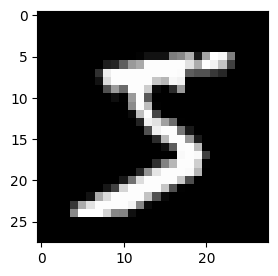

In [ ]:
fig, ax = plt.subplots(figsize=(3, 3))
ax.imshow(mnist_train_scaled_data[0][0][0], cmap="gray")
plt.show()

In [ ]:
# Calular la media y la desviación para todo el conjunto de datos
mini_batch_size = 10000
trainloader = torch.utils.data.DataLoader(mnist_train_scaled_data, batch_size=mini_batch_size, shuffle=False)
testloader = torch.utils.data.DataLoader(mnist_test_scaled_data, batch_size=mini_batch_size, shuffle=False)

# Inicialización de variables
suma_de_inputs = torch.tensor([0.0])
suma_cuadrada_de_inputs = torch.tensor([0.0])
contador_de_inputs = torch.tensor([0.0])

# TrainLoader: Cálculo de la suma de los inputs y la suma de los cuadrados de los inputs
print('TrainLoader:')
for idx, (inputs, target) in enumerate(trainloader):
  print(f'\tIteración {idx + 1}')
  n_observ, n_channels, image_size_weight, image_size_height = inputs.shape
  suma_de_inputs += inputs.sum(axis=[0, 2, 3])
  suma_cuadrada_de_inputs += (inputs ** 2).sum(axis=[0, 2, 3])
  contador_de_inputs += n_observ

# TestLoader: Cálculo de la suma de los inputs y la suma de los cuadrados de los inputs
print('TestLoader')
for idx, (inputs, target) in enumerate(testloader):
  n_observ, n_channels, image_size_weight, image_size_height = inputs.shape
  print(f'\tIteración {idx + 1}')
  suma_de_inputs += inputs.sum(axis=[0, 2, 3])
  suma_cuadrada_de_inputs += (inputs ** 2).sum(axis=[0, 2, 3])
  contador_de_inputs += n_observ

  # Total de pixeles
total_pixeles = contador_de_inputs * image_size_weight * image_size_height

# Media, Varianza y Desviación
media_gral = suma_de_inputs / total_pixeles
varianza_gral  = (suma_cuadrada_de_inputs / total_pixeles) - (media_gral ** 2)
desviacion_std_gral  = torch.sqrt(varianza_gral)
print(f'Media: {media_gral} - Desviación: {desviacion_std_gral}')

TrainLoader:
	Iteración 1
	Iteración 2
	Iteración 3
	Iteración 4
	Iteración 5
	Iteración 6
TestLoader
	Iteración 1
Media: tensor([0.1309]) - Desviación: tensor([0.3084])


In [ ]:
# Seteo para escalar y normalizar los datos y transformar en tensores
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.1307), (0.3081))
																])

# Escalar y Normalizar el conjunto de entrenamiento y el conjunto de pruebas
mnist_training_norm_data = datasets.MNIST('.',
                                        train=True,
                                        download=False,
                                        transform=transform)
mnist_test_norm_data = datasets.MNIST('.',
                                    train=False,
                                    download=False,
                                    transform=transform)

# Preparar el cargador de entrenamiento y el cargador de pruebas
trainloader = torch.utils.data.DataLoader(mnist_training_norm_data,
                                        batch_size=32,
                                        shuffle=True,
                                        num_workers=0)
testloader = torch.utils.data.DataLoader(mnist_test_norm_data,
                                        batch_size=32,
                                        shuffle=False,
                                        num_workers=0)

# Iterador sobre el cargador de batch de datos de entrenamiento
mini_batchs = enumerate(trainloader)

In [ ]:
# 1ra iteración sobre el cargador de batch de datos de entrenamiento
mini_batch_idx, (mini_batch_inputs, mini_batch_targets) = next(mini_batchs)
print(f'N° de mini-batch: {mini_batch_idx}')
print(f'Dimensiones de mini-batch de entradas: {mini_batch_inputs.shape}')
print(f'Dimensiones de mini-batch de targets: {mini_batch_targets.shape}')
print(f'Datos de entrada del mini-batch:\n\t {mini_batch_inputs[0][0][:8]}')
print(f'Datos de target del mini-batch:\n\t {mini_batch_targets[:8]}')

N° de mini-batch: 0
Dimensiones de mini-batch de entradas: torch.Size([32, 1, 28, 28])
Dimensiones de mini-batch de targets: torch.Size([32])
Datos de entrada del mini-batch:
	 tensor([[-0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
         -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
         -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
         -0.4242, -0.4242, -0.4242, -0.4242],
        [-0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
         -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
         -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
         -0.4242, -0.4242, -0.4242, -0.4242],
        [-0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
         -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
         -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
  

In [ ]:
# 2da iteración sobre el cargador de batch de datos de entrenamiento
mini_batch_idx, (mini_batch_inputs, mini_batch_targets) = next(mini_batchs)
print(f'N° de mini-batch: {mini_batch_idx}')
print(f'Dimensiones de mini-batch de entradas: {mini_batch_inputs.shape}')
print(f'Dimensiones de mini-batch de targets: {mini_batch_targets.shape}')
print(f'Datos de entrada del mini-batch:\n\t {mini_batch_inputs[0][0][:8]}')
print(f'Datos de target del mini-batch:\n\t {mini_batch_targets[:8]}')

N° de mini-batch: 1
Dimensiones de mini-batch de entradas: torch.Size([32, 1, 28, 28])
Dimensiones de mini-batch de targets: torch.Size([32])
Datos de entrada del mini-batch:
	 tensor([[-0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
         -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
         -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
         -0.4242, -0.4242, -0.4242, -0.4242],
        [-0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
         -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
         -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
         -0.4242, -0.4242, -0.4242, -0.4242],
        [-0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
         -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
         -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
  

### Clase ImageFolder

Esta clase nos ayuda a crear fácilmente conjuntos de datos de validación y entrenamiento de PyTorch sin escribir clases personalizadas. Luego podemos usar estos conjuntos de datos para crear nuestros cargadores de datos iterables.

Utilizaremos el conjunto de datos de clasificación de imágenes de [mariposas](https://www.kaggle.com/datasets/gpiosenka/butterfly-images40-species/) de Kaggle contiene 4955 imágenes para entrenamiento, 250 imágenes para validación y 250 imágenes para prueba. Y todas las imágenes son imágenes RGB de 224 × 224 dimensiones (con 3 canales de color).

---

**Estructura del directorio que contiene las imágenes**

La carpeta raíz de los inputs debe contener una carpeta  `train`, `validation` y una `test`, cada una con carpetas para cada clase. En cada carpeta se almacenarán las imágenes correspondientes a cada clase y a cada set train/validation/test .

    ├── train
    │   ├── class1
    |      ├── 1.jpg
    │      ├── 2.jpg
    │   ├── class2
    |      ├── 1.jpg
    │      ├── 2.jpg
    ├── validation
    │   ├── class1
    |      ├── 1.jpg
    │      ├── 2.jpg
    │   ├── class2
    |      ├── 1.jpg
    │      ├── 2.jpg
    ├── test
    │   ├── class1
    |      ├── 1.jpg
    │      ├── 2.jpg
    │   ├── class2
    |      ├── 1.jpg
    │      ├── 2.jpg


In [ ]:
import os
from google.colab import files
# Cargar archivos externos desde directorio local
base_dir = '/content/butterflies_classifier/'

for dataset in ['train', 'validation']:
    for clase in ['adonis', 'appollo']:
      # Construir path del directorio
      directory = os.path.join(base_dir, dataset, clase)
      # Crear directorio
      os.makedirs(directory, exist_ok=True)
      # Cambiar de directorio
      os.chdir(directory)
      print(f'Cargar imágenes de {dataset.upper()} clase {clase.upper()} en {directory}')
      uploaded = files.upload()

Cargar imágenes de TRAIN clase ADONIS en /content/butterflies_classifier/train/adonis


Saving 001.jpg to 001.jpg
Saving 002.jpg to 002.jpg
Saving 003.jpg to 003.jpg
Saving 004.jpg to 004.jpg
Cargar imágenes de TRAIN clase APPOLLO en /content/butterflies_classifier/train/appollo


Saving 001.jpg to 001.jpg
Saving 002.jpg to 002.jpg
Saving 003.jpg to 003.jpg
Saving 004.jpg to 004.jpg
Cargar imágenes de VALIDATION clase ADONIS en /content/butterflies_classifier/validation/adonis


Saving 1.jpg to 1.jpg
Saving 2.jpg to 2.jpg
Cargar imágenes de VALIDATION clase APPOLLO en /content/butterflies_classifier/validation/appollo


Saving 1.jpg to 1.jpg
Saving 2.jpg to 2.jpg


**Transformaciones de Imágenes**

- `transforms.Resize((255, 255))`: redimensiona la imagen a un tamaño de píxel de 255x255. Esto se hace para asegurarse de que todas las imágenes tengan el mismo tamaño antes de aplicar las transformaciones adicionales.

- `transforms.RandomCrop((224, 224))`: corta aleatoriamente la imagen en un rango de 224x224. Esto ayuda a introducir variabilidad en la ubicación de las imágenes.

La transformación RandomCrop se utiliza comúnmente como una técnica de aumento de datos para introducir variabilidad en las imágenes de entrenamiento. Al recortar aleatoriamente una región de la imagen, se pueden capturar diferentes partes o características de la imagen, lo que ayuda a mejorar la capacidad de generalización del modelo y lo hace más robusto a la variación en la ubicación de los objetos en las imágenes.

Es importante tener en cuenta que al aplicar esta transformación, la imagen se recorta de forma aleatoria y se pierde información fuera de la región recortada. Por lo tanto, es recomendable tener suficiente margen de espacio en las imágenes de entrada para asegurar que las regiones de interés no se corten por completo.

- `transforms.RandomRotation(30)`: Esta transformación aplica una rotación aleatoria a la imagen de entrada en un rango de ±30 grados. Esto significa que la imagen puede rotarse en cualquier dirección dentro de ese rango.

- `transforms.RandomHorizontalFlip(p=0.5)`: voltea aleatoriamente horizontalmente la imagen con una probabilidad de 0.5. Esto ayuda a introducir variabilidad en la orientación horizontal de las imágenes.

- `transforms.RandomVerticalFlip(p=0.5)`: voltea aleatoriamente verticalmente la imagen con una probabilidad de 0.5. Esto ayuda a introducir variabilidad en la orientación vertical de las imágenes.

Cuando se establece p=0.5, la transformación de volteo vertical se aplicará con una probabilidad del 50%. Esto significa que para cada imagen, hay un 50% de probabilidad de que se aplique la transformación y un 50% de probabilidad de que no se aplique.
Si se desea aplicar la transformación de volteo vertical a todas las imágenes, se puede establecer p=1.0. Por otro lado, si se desea evitar completamente la transformación, se puede establecer p=0.0.

- `transforms.GaussianBlur(kernel_size=(3, 7), sigma=(0.2, 3))`: aplica un desenfoque gaussiano aleatorio a la imagen. Con parámetros tamaño del kernel y desviación estándar, que se eligen aleatoriamente dentro de los rangos especificados. Esto puede ayudar a suavizar y difuminar la imagen.

- `transforms.RandomRotation(degrees=(30, 70))`: rota aleatoriamente la imagen en un rango de grados especificado. Esto ayuda a introducir variabilidad en la orientación y la posición de las imágenes.

- `transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])`: normaliza los valores de los píxeles de la imagen. Resta la media especificada y divide por la desviación estándar especificada en cada canal de color. La normalización ayuda a que los datos tengan una escala adecuada para el procesamiento del modelo. Esta normalización escala los valores de píxeles para que queden dentro del rango [-1, 1].


In [ ]:
BATCH_SIZE = 2

# Configuración para la transformación de los datos
train_transform = transforms.Compose([
    transforms.Resize((255, 255)),
    # Ejemplos de data augmentation
    # transforms.RandomHorizontalFlip(p=0.5),
    # transforms.RandomVerticalFlip(p=0.5),
    # transforms.GaussianBlur(kernel_size=(5, 9), sigma=(0.1, 5)),
    # transforms.RandomRotation(degrees=(30, 70)),
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.5, 0.5, 0.5],
        std=[0.5, 0.5, 0.5]
    )
])

# Cargar dataset de entrenamiento
train_dataset = datasets.ImageFolder(
                          root='/content/butterflies_classifier/train',
                          transform=train_transform
)

# Data loaders de entramiento
train_loader = DataLoader(
                    train_dataset, batch_size=BATCH_SIZE,
                    shuffle=False,
                    num_workers=2,
                    # Indicar si los datos se deben fijar en la memoria.
                    # Esto puede acelerar la transferencia de datos entre la CPU y la GPU,
                    # si estás utilizando una GPU para el entrenamiento
                    pin_memory=False
)

# Tranformar dataset de validación
valid_transform = transforms.Compose([
  # TODO
])

# Cargar dataset de validación
# valid_dataset = datasets.ImageFolder(
#                           root='/content/butterflies_classifier/valid',
#                           transform=valid_transform
# )

# Data loaders de validación
# valid_loader = DataLoader(
#                     valid_dataset, batch_size=BATCH_SIZE, shuffle=False,
#                     num_workers=2, pin_memory=False
# )

In [ ]:
# Clases del dataset
train_dataset.classes

['adonis', 'appollo']

In [ ]:
# Iterar sobre el cargador de batch de datos de entrenamiento
mini_batchs = enumerate(train_loader)

In [ ]:
# 1ra iteración sobre el cargador de batch de datos de entrenamiento
mini_batch_idx, (mini_batch_inputs, mini_batch_targets) = next(mini_batchs)
print(f'N° de mini-batch: {mini_batch_idx}')
print(f'Dimensiones de mini-batch de entradas: {mini_batch_inputs.shape}')
print(f'Dimensiones de mini-batch de targets: {mini_batch_targets.shape}')
print(f'Datos de entrada del mini-batch:\n\t {mini_batch_inputs[:2]}')
print(f'Datos de target del mini-batch:\n\t {mini_batch_targets}')

N° de mini-batch: 0
Dimensiones de mini-batch de entradas: torch.Size([2, 3, 255, 255])
Dimensiones de mini-batch de targets: torch.Size([2])
Datos de entrada del mini-batch:
	 tensor([[[[-1.0000, -1.0000, -0.9686,  ..., -1.0000, -1.0000, -1.0000],
          [-1.0000, -0.9843, -0.9451,  ..., -1.0000, -1.0000, -1.0000],
          [-1.0000, -0.9765, -0.9216,  ..., -1.0000, -1.0000, -1.0000],
          ...,
          [-0.3176, -0.3490, -0.4353,  ..., -0.9922, -0.9922, -0.9843],
          [-0.3098, -0.3569, -0.4431,  ..., -1.0000, -1.0000, -0.9922],
          [-0.3176, -0.3725, -0.4510,  ..., -0.9922, -1.0000, -1.0000]],

         [[-0.9451, -0.8980, -0.8353,  ..., -0.9686, -0.9686, -0.9608],
          [-0.9294, -0.8824, -0.8118,  ..., -0.9765, -0.9686, -0.9608],
          [-0.9137, -0.8510, -0.7804,  ..., -0.9765, -0.9686, -0.9608],
          ...,
          [-0.1216, -0.1529, -0.2471,  ..., -0.9529, -0.9451, -0.9373],
          [-0.1294, -0.1765, -0.2706,  ..., -0.9608, -0.9529, -0.9451],

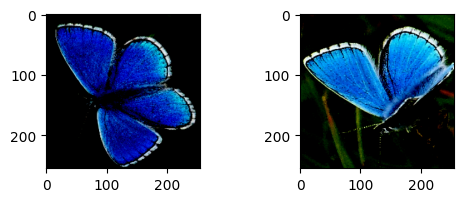

In [ ]:
# Visualicemos la imágenes del batch 0: 1ra y 2da imagen
fig = plt.figure(2, figsize=(6, 2))
fig.add_subplot(1, 2, 1)
plt.imshow(mini_batch_inputs[0].T)  # .T transpone los vectores [C x H x W] a [H x W x C]
fig.add_subplot(1, 2, 2)
plt.imshow(mini_batch_inputs[1].T)
plt.show()

In [ ]:
# 2da iteración sobre el cargador de batch de datos de entrenamiento
mini_batch_idx, (mini_batch_inputs, mini_batch_targets) = next(mini_batchs)
print(f'N° de mini-batch: {mini_batch_idx}')
print(f'Dimensiones de mini-batch de entradas: {mini_batch_inputs.shape}')
print(f'Dimensiones de mini-batch de targets: {mini_batch_targets.shape}')
print(f'Datos de entrada del mini-batch:\n\t {mini_batch_inputs[:2]}')
print(f'Datos de target del mini-batch:\n\t {mini_batch_targets}')

N° de mini-batch: 1
Dimensiones de mini-batch de entradas: torch.Size([2, 3, 255, 255])
Dimensiones de mini-batch de targets: torch.Size([2])
Datos de entrada del mini-batch:
	 tensor([[[[ 0.0196,  0.0196,  0.0353,  ...,  0.7020,  0.7020,  0.6863],
          [ 0.0431,  0.0353,  0.0275,  ...,  0.6078,  0.5765,  0.5608],
          [ 0.0588,  0.0275,  0.0196,  ...,  0.4667,  0.4353,  0.4039],
          ...,
          [-0.4353, -0.3961, -0.3255,  ..., -0.2784, -0.2627, -0.2706],
          [-0.4196, -0.3647, -0.2863,  ..., -0.1608, -0.1294, -0.1294],
          [-0.3882, -0.3333, -0.2549,  ..., -0.0353, -0.0039, -0.0039]],

         [[-0.0353, -0.0353, -0.0118,  ...,  0.6314,  0.6314,  0.6157],
          [-0.0118, -0.0196, -0.0196,  ...,  0.5451,  0.5294,  0.5137],
          [ 0.0039, -0.0196, -0.0275,  ...,  0.4275,  0.3961,  0.3725],
          ...,
          [-0.3176, -0.2706, -0.2157,  ..., -0.1137, -0.1137, -0.1216],
          [-0.2863, -0.2392, -0.1686,  ..., -0.0118,  0.0039,  0.0039],

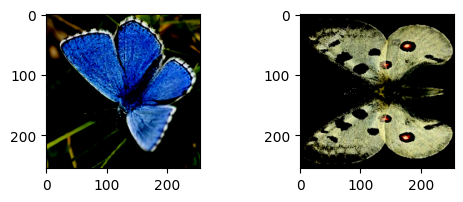

In [ ]:
# Visualicemos la imágenes del 2do batch: 3ra y 4ta imagen
fig = plt.figure(2, figsize=(6, 2))
fig.add_subplot(1, 2, 1)
plt.imshow(mini_batch_inputs[0].T)  # .T transpone los vectores [C x H x W] a [H x W x C]
fig.add_subplot(1, 2, 2)
plt.imshow(mini_batch_inputs[1].T)
plt.show()

In [ ]:
# 3ra iteración sobre el cargador de batch de datos de entrenamiento
mini_batch_idx, (mini_batch_inputs, mini_batch_targets) = next(mini_batchs)
print(f'N° de mini-batch: {mini_batch_idx}')
print(f'Dimensiones de mini-batch de entradas: {mini_batch_inputs.shape}')
print(f'Dimensiones de mini-batch de targets: {mini_batch_targets.shape}')
print(f'Datos de entrada del mini-batch:\n\t {mini_batch_inputs[:2]}')
print(f'Datos de target del mini-batch:\n\t {mini_batch_targets}')

N° de mini-batch: 2
Dimensiones de mini-batch de entradas: torch.Size([2, 3, 255, 255])
Dimensiones de mini-batch de targets: torch.Size([2])
Datos de entrada del mini-batch:
	 tensor([[[[ 0.8353,  0.7882,  0.7490,  ..., -0.0353, -0.0353, -0.0980],
          [ 0.8039,  0.7569,  0.7176,  ..., -0.1059, -0.1137, -0.1137],
          [ 0.7725,  0.7333,  0.7020,  ..., -0.0745, -0.1059, -0.0902],
          ...,
          [ 0.1686,  0.0588, -0.0745,  ..., -0.8039, -0.7725, -0.7020],
          [ 0.1765,  0.0902, -0.0353,  ..., -0.7725, -0.7412, -0.7020],
          [ 0.1765,  0.1059,  0.0039,  ..., -0.7412, -0.7098, -0.6863]],

         [[ 0.8431,  0.7961,  0.7569,  ...,  0.0353,  0.0667,  0.0275],
          [ 0.8118,  0.7647,  0.7255,  ..., -0.0431, -0.0118,  0.0118],
          [ 0.7804,  0.7412,  0.7098,  ..., -0.0196, -0.0196,  0.0118],
          ...,
          [ 0.1608,  0.0431, -0.0902,  ..., -0.8431, -0.8353, -0.7725],
          [ 0.1686,  0.0824, -0.0353,  ..., -0.8196, -0.8039, -0.7647],

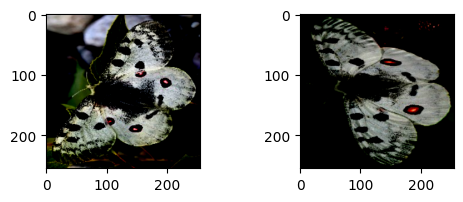

In [ ]:
# Visualicemos la imágenes del 3er batch: 5ta y 6ta imagen
fig = plt.figure(2, figsize=(6, 2))
fig.add_subplot(1, 2, 1)
plt.imshow(mini_batch_inputs[0].T)  # .T transpone los vectores [C x H x W] a [H x W x C]
fig.add_subplot(1, 2, 2)
plt.imshow(mini_batch_inputs[1].T)
plt.show()

In [ ]:
# Valores minimo y máximo de los datos normalizados
mini_batch_inputs.min(), mini_batch_inputs.max()

(tensor(-1.), tensor(1.))

_Nota_: La normalización empleando valores de media y desviación estandard de 0.5 es una forma sencilla y estandarizada de preprocesar datos de imágenes, pero puede que no sea óptima para todos los conjuntos de datos.


## Datos No Estructurados - Texto
---

PPT: [P. III - Procesamiento de Lenguaje Natural (NLP)](https://docs.google.com/presentation/d/1hrN4z4DD-gto_nmlBHdZIaJkv7frOrTMiC_smj3Fdrg/edit#slide=id.g27cd7976a91_0_79)

Notebook: [6. Procesamiento de Lenguaje Natural](https://colab.research.google.com/drive/1i6LjpdY9KWleJyySqSzr1qYONr3UqM7-?usp=drive_link])

